In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 15.9 MB/s eta 0:00:00


In [ ]:
!pip install es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling wasabi-1.1.3:
      Successfully uninstalled wasabi-1.1.3
  Attempting uninstall: typer
    Found existing installation: typer 0.13.0
    Uninstalling typer-0.13.0:
      Successfully uninstalled typer-0.13.0
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.0.5
    Uninstalling smart-open-7.0.5:
      Successfully uni

In [ ]:
!pip install language_tool_python

In [ ]:
 #!python -m spacy download 'en_core_web_lg'

In [ ]:
#!pip install -U spacy
#!python -m spacy download es_core_news_lg
!python -m spacy download en_core_web_lg

2024-11-12 21:14:16.933567: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 21:14:17.043576: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-12 21:14:17.055877: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 21:14:17.083351: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-12 21:14:19.529829: W tensorflow/compiler/tf2

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296187 sha256=a785d3ae8eadaaf9a4d245c8e4e40d0b654330c25768fd68e08418ba7de86fd0
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
!pip install kneed

In [ ]:
!pip install plot_metric

In [ ]:
import pandas as pd
import numpy as np
import language_tool_python
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import fasttext ## embedings
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
archivo_tsv = "test_news.csv"
df = pd.read_csv(archivo_tsv)
print(df.head(2))
print(df.shape)


   publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
(1020091, 2)


In [ ]:
df.shape

(1020091, 2)

In [ ]:
df.iloc[0]["headline_text"]

'aba decides against community broadcasting licence'

In [ ]:
datos=df

## Tokenización y lematización

In [ ]:
sents = [] # formar listas con las oraciones de cada texto
tokens = [] # separar las palabras y caracteres de cada texto
lemma = [] # convertir las palabras en su raíz (ayuda --> ayudar)
pos = [] # indica en cada posición si la palabra es pronombre, conjunción, etc
ner = [] # indica si la palabra es considerada una entidad (nombre propio importante en el texto)

stop_words = set(STOP_WORDS)
# stop_words.update(punctuation) # remove it if you need punctuation

#nlp = spacy.load('es_core_news_lg') ## ESPAÑOL
nlp = spacy.load('en_core_web_lg')
# suppress numpy warnings
#np.warnings.filterwarnings('ignore')

for essay in nlp.pipe(datos['headline_text'], batch_size=100, n_process=4):
    if essay.is_parsed:
        tokens.append([e.text for e in essay])
        sents.append([sent.text.strip() for sent in essay.sents])
        pos.append([e.pos_ for e in essay])
        ner.append([e.text for e in essay.ents])
        lemma.append([n.lemma_ for n in essay])
    else:
        tokens.append(None)
        lemma.append(None)
        pos.append(None)
        sents.append(None)
        ner.append(None)

datos['tokens'] = tokens
datos['lemma'] = lemma
datos['pos'] = pos
datos['sents'] = sents
datos['ner'] = ner

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:1145: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)
<ipython-input-19-f9f8d7b41d16>:16: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  if essay.is_parsed:


In [ ]:
datos.iloc[0]["tokens"]

['aba', 'decides', 'against', 'community', 'broadcasting', 'licence']

In [ ]:
datos.iloc[0]["lemma"]

['aba', 'decide', 'against', 'community', 'broadcasting', 'licence']

In [ ]:
datos.iloc[0]["pos"]

['PROPN', 'VERB', 'ADP', 'NOUN', 'NOUN', 'NOUN']

In [ ]:
datos.iloc[0]["sents"]

['aba decides against community broadcasting licence']

In [ ]:
datos.iloc[0]["ner"]

['aba']

## Stopwords y agregación de componentes de semántica y sintaxis

In [ ]:

# Conteos de categorías gramaticales
datos['token_count'] = datos.apply(lambda x: len(x['tokens']), axis=1)
datos['unique_token_count'] = datos.apply(lambda x: len(set(x['tokens'])), axis=1)
datos['nostop_count'] = datos.apply(lambda x: len([token for token in x['tokens'] if token not in stop_words]), axis=1)
datos['sent_count'] = datos.apply(lambda x: len(x['sents']), axis=1)
datos['ner_count'] = datos.apply(lambda x: len(x['ner']), axis=1)
datos['comma'] = datos.apply(lambda x: x['headline_text'].count(','), axis=1)
datos['question'] = datos.apply(lambda x: x['headline_text'].count('?'), axis=1)
datos['exclamation'] = datos.apply(lambda x: x['headline_text'].count('!'), axis=1)
datos['quotation'] = datos.apply(lambda x: x['headline_text'].count('"') + x['headline_text'].count("'"), axis=1)
datos['organization'] = datos.apply(lambda x: x['headline_text'].count(r'@ORGANIZATION'), axis=1)
datos['caps'] = datos.apply(lambda x: x['headline_text'].count(r'@CAPS'), axis=1)
datos['person'] = datos.apply(lambda x: x['headline_text'].count(r'@PERSON'), axis=1)
datos['location'] = datos.apply(lambda x: x['headline_text'].count(r'@LOCATION'), axis=1)
datos['money'] = datos.apply(lambda x: x['headline_text'].count(r'@MONEY'), axis=1)
datos['time'] = datos.apply(lambda x: x['headline_text'].count(r'@TIME'), axis=1)
datos['date'] = datos.apply(lambda x: x['headline_text'].count(r'@DATE'), axis=1)
datos['percent'] = datos.apply(lambda x: x['headline_text'].count(r'@PERCENT'), axis=1)
datos['noun'] = datos.apply(lambda x: x['pos'].count('NOUN'), axis=1)
datos['adj'] = datos.apply(lambda x: x['pos'].count('ADJ'), axis=1)
datos['pron'] = datos.apply(lambda x: x['pos'].count('PRON'), axis=1)
datos['verb'] = datos.apply(lambda x: x['pos'].count('VERB'), axis=1)
datos['noun'] = datos.apply(lambda x: x['pos'].count('NOUN'), axis=1)
datos['cconj'] = datos.apply(lambda x: x['pos'].count('CCONJ'), axis=1)
datos['adv'] = datos.apply(lambda x: x['pos'].count('ADV'), axis=1)
datos['det'] = datos.apply(lambda x: x['pos'].count('DET'), axis=1)
datos['propn'] = datos.apply(lambda x: x['pos'].count('PROPN'), axis=1)
datos['num'] = datos.apply(lambda x: x['pos'].count('NUM'), axis=1)
datos['part'] = datos.apply(lambda x: x['pos'].count('PART'), axis=1)
datos['intj'] = datos.apply(lambda x: x['pos'].count('INTJ'), axis=1)

In [ ]:
datos.head(2)

,publish_date,headline_text,tokens,lemma,pos,sents,ner,token_count,unique_token_count,nostop_count,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,20030219,aba decides against community broadcasting lic...,"[aba, decides, against, community, broadcastin...","[aba, decide, against, community, broadcasting...","[PROPN, VERB, ADP, NOUN, NOUN, NOUN]",[aba decides against community broadcasting li...,[aba],6,6,5,...,0,0,1,0,0,0,1,0,0,0
1,20030219,act fire witnesses must be aware of defamation,"[act, fire, witnesses, must, be, aware, of, de...","[act, fire, witness, must, be, aware, of, defa...","[NOUN, NOUN, NOUN, AUX, VERB, ADJ, ADP, NOUN]",[act fire witnesses must be aware of defamation],[],8,8,5,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
datos.columns

Index(['publish_date', 'headline_text', 'tokens', 'lemma', 'pos', 'sents',
       'ner', 'token_count', 'unique_token_count', 'nostop_count',
       'sent_count', 'ner_count', 'comma', 'question', 'exclamation',
       'quotation', 'organization', 'caps', 'person', 'location', 'money',
       'time', 'date', 'percent', 'noun', 'adj', 'pron', 'verb', 'cconj',
       'adv', 'det', 'propn', 'num', 'part', 'intj'],
      dtype='object')

## 1. Modelo LDA

In [ ]:
# Aquí ya se tiene el texto corregido
data = datos.get(['headline_text','publish_date'])
data.head(2)

,headline_text,publish_date
0,aba decides against community broadcasting lic...,20030219
1,act fire witnesses must be aware of defamation,20030219


### Procesamiento para LDA

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import stanza
import re
from nltk.corpus import stopwords
import es_core_news_sm
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

import stanza
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma')

#"" Número de stopwords en nltk
stop_nltk = stopwords.words('english')
print("nltk :",len(stop_nltk))

## Número de stopwords en spacy
nlp = es_core_news_sm.load()
stop_spacy = nlp.Defaults.stop_words
print("spacy:", len(stop_spacy))
stop_todas = list(stop_spacy.union(set(stop_nltk)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explic

nltk : 179
spacy: 551


In [ ]:
from nltk.stem import PorterStemmer

def lemmatize_stemming(text):
    ps = PorterStemmer()
    return ps.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text): #  gensim.utils.simple_preprocess tokeniza el texto
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
data['processed_text'] = data.apply(lambda row:  ' '.join(token.lemma_ for token in nlp(row["headline_text"]).sents), axis=1)
data['processed_text'] = data['processed_text'].str.lower()
#data['processed_text'] = data['processed_text'].replace(list('áéíóú'),list('aeiou'),regex=True)
data['processed_text'] = data['processed_text'].str.replace('[^\w\s]','')
data['processed_text'] = data['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_todas)]))
data.head(2)




<ipython-input-26-42b8fcfecf32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_text'] = data.apply(lambda row:  ' '.join(token.lemma_ for token in nlp(row["headline_text"]).sents), axis=1)
<ipython-input-26-42b8fcfecf32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_text'] = data['processed_text'].str.lower()
<ipython-input-26-42b8fcfecf32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,headline_text,publish_date,processed_text
0,aba decides against community broadcasting lic...,20030219,ar decid community broadcasting licence
1,act fire witnesses must be aware of defamation,20030219,act fire witnesses must aware defamation


In [ ]:
data["processed_text"] = data["headline_text"].copy()
data = data.drop(["processed_text"],axis = 1)
data.head(5)

<ipython-input-27-48f8639fb86b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["processed_text"] = data["headline_text"].copy()


,headline_text,publish_date
0,aba decides against community broadcasting lic...,20030219
1,act fire witnesses must be aware of defamation,20030219
2,a g calls for infrastructure protection summit,20030219
3,air nz staff in aust strike for pay rise,20030219
4,air nz strike to affect australian travellers,20030219


In [ ]:
documents = data
print(documents[:5])

                                       headline_text  publish_date
0  aba decides against community broadcasting lic...      20030219
1     act fire witnesses must be aware of defamation      20030219
2     a g calls for infrastructure protection summit      20030219
3           air nz staff in aust strike for pay rise      20030219
4      air nz strike to affect australian travellers      20030219


In [ ]:

processed_docs = documents['headline_text'].map(preprocess)
# Mostrar 10 primero procesados
processed_docs[:10]


,headline_text
0,"[decid, commun, broadcast, licenc]"
1,"[wit, awar, defam]"
2,"[call, infrastructur, protect, summit]"
3,"[staff, aust, strike, rise]"
4,"[strike, affect, australian, travel]"
5,"[ambiti, olsson, win, tripl, jump]"
6,"[antic, delight, record, break, barca]"
7,"[aussi, qualifi, stosur, wast, memphi, match]"
8,"[aust, address, secur, council, iraq]"
9,"[australia, lock, timet]"


## Número de veces que aparecen las palabras en el documento

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 broadcast
1 commun
2 decid
3 licenc
4 awar
5 defam
6 wit
7 call
8 infrastructur
9 protect
10 summit


Filtrar los tokens que aparecen en menos de 15 documentos (número absoluto) o más de 0,5 documentos (fracción del tamaño total del corpus, no número absoluto). después de los dos pasos anteriores, conserve solo los primeros 10 tokens más frecuentes.

In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=500)

In [ ]:
from gensim import corpora
from google.colab import files

# Guarda el diccionario
dictionary.save("dictionary.dict")

# Descarga el archivo guardado
files.download("dictionary.dict")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0]

[(0, 1)]

In [ ]:
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0],
    dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

Word 0 ("commun") appears 1 time.


## TF IDF

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


## LDA sin TFIDF

In [ ]:
bow_corpus[0:20]

[[(0, 1)],
 [],
 [(1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1)],
 [(6, 1), (7, 1)],
 [(8, 1)],
 [(9, 1), (10, 1)],
 [(11, 1), (12, 1)],
 [(3, 1), (13, 1), (14, 1), (15, 1)],
 [(16, 1)],
 [(17, 1)],
 [],
 [(18, 1)],
 [(19, 1), (20, 1)],
 [(21, 1), (22, 1)],
 [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1)],
 [(28, 1), (29, 1)],
 [(30, 1), (31, 1)],
 [(14, 1), (32, 1), (33, 1), (34, 1)],
 []]

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)

In [ ]:
lda_model.save('lda_model.model')

In [ ]:
from google.colab import files

# Descargar el archivo del modelo
files.download('lda_model.model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Tópicos

In [ ]:
lda_model.print_topics(-1)

[(0,
  '0.041*"polic" + 0.023*"charg" + 0.022*"interview" + 0.016*"death" + 0.016*"warn" + 0.016*"urg" + 0.014*"attack" + 0.014*"murder" + 0.013*"jail" + 0.013*"council"'),
 (1,
  '0.014*"fund" + 0.012*"sydney" + 0.012*"council" + 0.011*"open" + 0.011*"nation" + 0.011*"farmer" + 0.011*"hospit" + 0.010*"fear" + 0.010*"talk" + 0.010*"chang"'),
 (2,
  '0.026*"plan" + 0.025*"say" + 0.021*"govt" + 0.017*"australia" + 0.016*"kill" + 0.016*"crash" + 0.015*"water" + 0.014*"health" + 0.012*"year" + 0.012*"accus"')]

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.041*"polic" + 0.023*"charg" + 0.022*"interview" + 0.016*"death" + 0.016*"warn" + 0.016*"urg" + 0.014*"attack" + 0.014*"murder" + 0.013*"jail" + 0.013*"council"
Topic: 1 
Words: 0.014*"fund" + 0.012*"sydney" + 0.012*"council" + 0.011*"open" + 0.011*"nation" + 0.011*"farmer" + 0.011*"hospit" + 0.010*"fear" + 0.010*"talk" + 0.010*"chang"
Topic: 2 
Words: 0.026*"plan" + 0.025*"say" + 0.021*"govt" + 0.017*"australia" + 0.016*"kill" + 0.016*"crash" + 0.015*"water" + 0.014*"health" + 0.012*"year" + 0.012*"accus"


## Evaluación del primer documento

In [ ]:
processed_docs[0]

['decid', 'commun', 'broadcast', 'licenc']

In [ ]:
for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 3)))


Score: 0.6220443844795227	 
Topic: 0.014*"fund" + 0.012*"sydney" + 0.012*"council"

Score: 0.20364242792129517	 
Topic: 0.026*"plan" + 0.025*"say" + 0.021*"govt"

Score: 0.17431320250034332	 
Topic: 0.041*"polic" + 0.023*"charg" + 0.022*"interview"


## Asignar clúster o tópicos a la base de datos

In [ ]:
lda_model[bow_corpus[0]] # clúster y probabilidades

[(0, 0.17431422), (1, 0.6219971), (2, 0.20368867)]

máximo en individuo 1

In [ ]:
ind_without_tfidf = lda_model[bow_corpus]
y = 0 # individuo

lista = [ind_without_tfidf[y][x][1] for x in range(2)]
topicos = list(np.arange(10))
topicos[np.argmax(lista)] # tópico

1

In [ ]:
ind_without_tfidf[y]

[(0, 0.17431106), (1, 0.62214583), (2, 0.20354316)]

In [ ]:
y = 0
lista = [ind_without_tfidf[y][x][1] for x in range(len(ind_without_tfidf[y]))]
ind_without_tfidf[y][np.argmax(lista)][0] # tópico

1

In [ ]:
topics_wo = [ind_without_tfidf[y][np.argmax( [ind_without_tfidf[y][x][1] for x in range(len(ind_without_tfidf[y]))])][0] for y in range(data.shape[0])]

In [ ]:
data["topic"] = topics_wo
data.head(2)

,headline_text,publish_date,topic
0,aba decides against community broadcasting lic...,20030219,1
1,act fire witnesses must be aware of defamation,20030219,0


## Caracterización tópicos

In [ ]:
data["topic"].unique()

array([1, 0, 2])

In [ ]:
topic_list = [x for x in data["topic"].unique()]
topic_list = [x for x in np.sort(topic_list)]
topic_list

[0, 1, 2]

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
data.head()

,headline_text,publish_date,topic
0,aba decides against community broadcasting lic...,20030219,1
1,act fire witnesses must be aware of defamation,20030219,0
2,a g calls for infrastructure protection summit,20030219,1
3,air nz staff in aust strike for pay rise,20030219,2
4,air nz strike to affect australian travellers,20030219,2


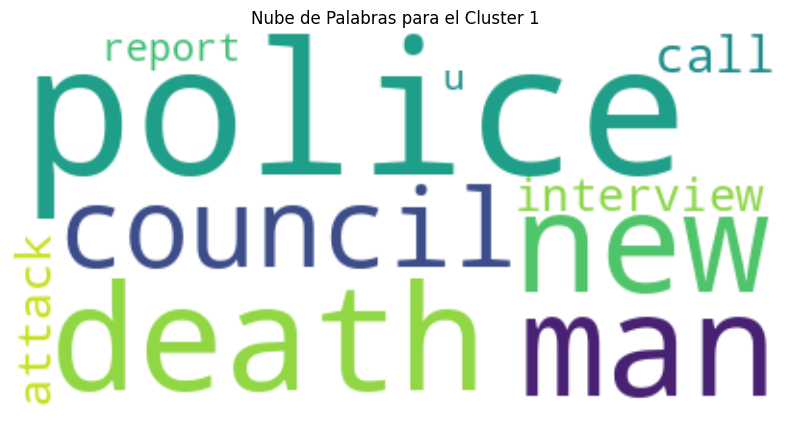

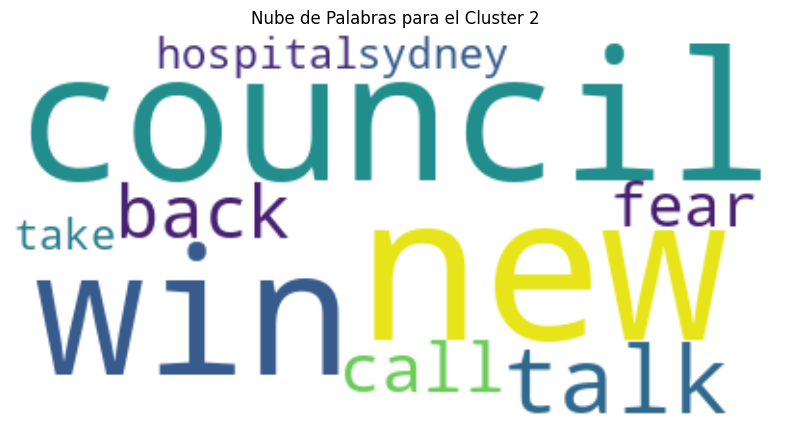

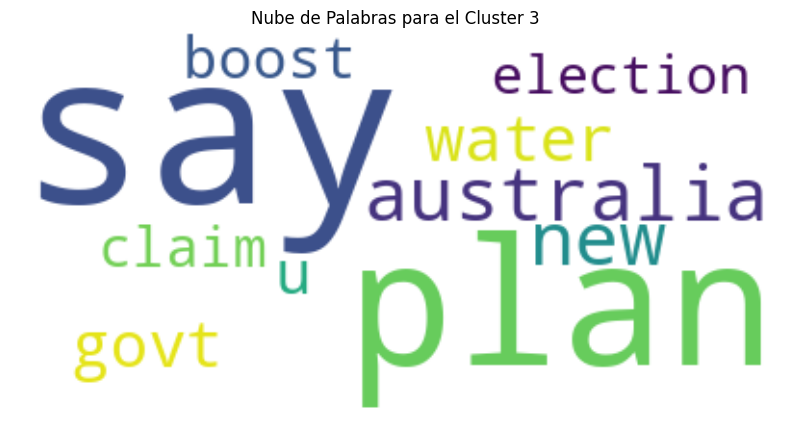

In [ ]:
for i in range(len(topic_list)):
    cluster_texts = data[data['topic'] == i]['headline_text']
    wordcloud = WordCloud(max_words=10, background_color='white').generate(' '.join(cluster_texts))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras para el Cluster {i+1}')
    plt.show()

## Guardar textos corregidos para hacer Embeddings

## 2. LDA con TF IDF

In [ ]:
corpus_tfidf[0]

[(0, 1.0)]

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.018*"govt" + 0.015*"kill" + 0.015*"say" + 0.012*"water" + 0.012*"open" + 0.010*"seek" + 0.010*"claim" + 0.010*"world" + 0.010*"death" + 0.009*"crash"
Topic: 1 Word: 0.014*"report" + 0.013*"jail" + 0.012*"fund" + 0.012*"call" + 0.012*"australian" + 0.011*"farmer" + 0.010*"win" + 0.010*"accus" + 0.010*"return" + 0.010*"test"
Topic: 2 Word: 0.030*"interview" + 0.026*"polic" + 0.019*"charg" + 0.019*"council" + 0.015*"plan" + 0.015*"court" + 0.013*"face" + 0.013*"australia" + 0.012*"market" + 0.012*"sydney"


In [ ]:
lda_model_tfidf.save('lda_modeltfidf.model')
files.download('lda_modeltfidf.model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Evaluación primer texto

In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 3)))


Score: 0.6556172370910645	 
Topic: 0.018*"say" + 0.018*"plan" + 0.015*"australia"

Score: 0.1764906942844391	 
Topic: 0.021*"charg" + 0.013*"water" + 0.013*"council"

Score: 0.16789206862449646	 
Topic: 0.032*"interview" + 0.018*"polic" + 0.015*"court"


## Asignación de clúster

In [ ]:
ind_with_tfidf = lda_model_tfidf[bow_corpus] # Todos los individuos

In [ ]:
%%time
topics_with = [ind_with_tfidf[y][np.argmax( [ind_with_tfidf[y][x][1] for x in range(len(ind_with_tfidf[y]))])][0] for y in range(data.shape[0])]

CPU times: user 50.5 s, sys: 448 ms, total: 50.9 s
Wall time: 55.3 s


In [ ]:
data["topic_tfidf"] = topics_with
data.head()

,headline_text,publish_date,topic,topic_tfidf
0,aba decides against community broadcasting lic...,20030219,1,0
1,act fire witnesses must be aware of defamation,20030219,0,0
2,a g calls for infrastructure protection summit,20030219,1,1
3,air nz staff in aust strike for pay rise,20030219,2,2
4,air nz strike to affect australian travellers,20030219,2,1


In [ ]:
data["topic_tfidf"].value_counts()

,count
topic_tfidf,
0,25125
1,18413
2,18152


In [ ]:
data_LDA = data.copy()
data_LDA.head()

,headline_text,publish_date,topic,topic_tfidf
0,aba decides against community broadcasting lic...,20030219,1,0
1,act fire witnesses must be aware of defamation,20030219,0,0
2,a g calls for infrastructure protection summit,20030219,1,1
3,air nz staff in aust strike for pay rise,20030219,2,2
4,air nz strike to affect australian travellers,20030219,2,1


## Caracterización

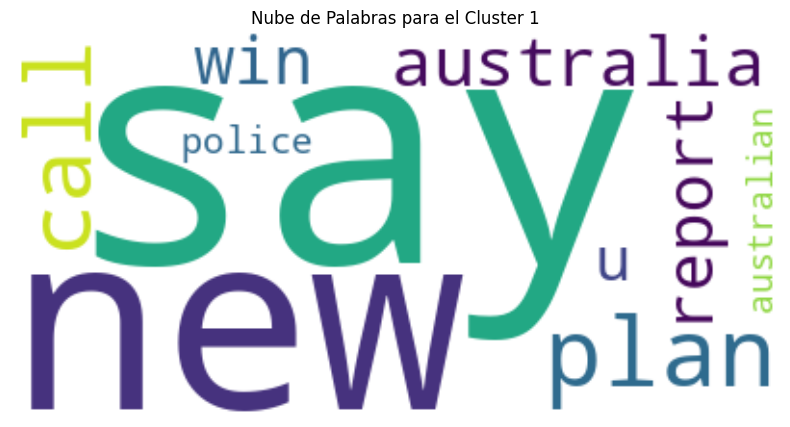

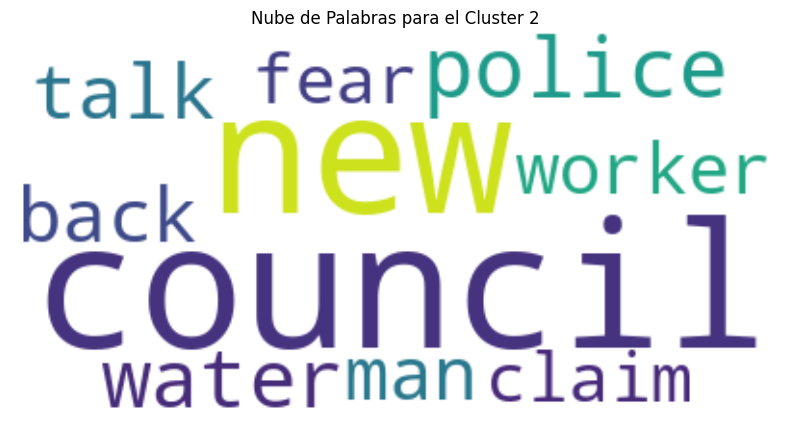

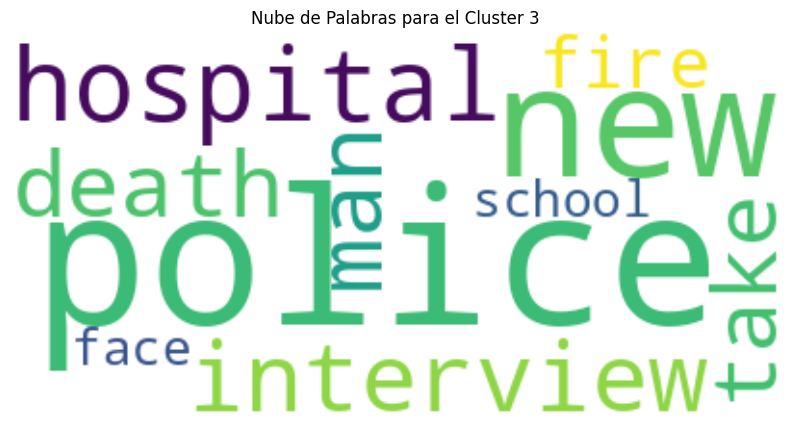

In [ ]:
for i in range(len(topic_list)):
    cluster_texts = data[data['topic_tfidf'] == i]['headline_text']
    wordcloud = WordCloud(max_words=10, background_color='white').generate(' '.join(cluster_texts))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras para el Cluster {i+1}')
    plt.show()

## 3. Modelo de Lenguaje Natural BERT

### Embeddings

In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import spacy

In [ ]:
# Cargar el modelo BERT preentrenado para español
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
## Datos guardados en la última versión de procesamiento
#data = pd.read_csv(path + 'ensayos_NLP_Encuestas.csv')
data.head(5)

,headline_text,publish_date,topic,topic_tfidf
0,aba decides against community broadcasting lic...,20030219,1,0
1,act fire witnesses must be aware of defamation,20030219,0,0
2,a g calls for infrastructure protection summit,20030219,1,1
3,air nz staff in aust strike for pay rise,20030219,2,2
4,air nz strike to affect australian travellers,20030219,2,1


In [ ]:
data['processed_text'] = data.apply(lambda row:  ' '.join(token.lemma_ for token in nlp(row["headline_text"]).sents), axis=1)
data['processed_text'] = data['processed_text'].str.lower()
#data['processed_text'] = data['processed_text'].replace(list('áéíóú'),list('aeiou'),regex=True)
data['processed_text'] = data['processed_text'].str.replace('[^\w\s]','')
data['processed_text'] = data['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_todas)]))
# data['processed_text'] = data['essay_text'].str.lower().str.replace(r'\W', ' ').str.split()

In [ ]:
data.head(5)

,headline_text,publish_date,topic,topic_tfidf,processed_text
0,aba decides against community broadcasting lic...,20030219,1,0,ar decid community broadcasting licence
1,act fire witnesses must be aware of defamation,20030219,0,0,act fire witnesses must aware defamation
2,a g calls for infrastructure protection summit,20030219,1,1,g calls infrastructure protection summit
3,air nz staff in aust strike for pay rise,20030219,2,2,air nz staff aust strike pay risir
4,air nz strike to affect australian travellers,20030219,2,1,air nz strike affect australian travellers


In [ ]:
# Obtener embeddings con BERT
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    # Usar la representación de la [CLS] token
    cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return cls_embedding.flatten()

# Aplicar BERT a cada texto
data['bert_embedding'] = data['headline_text'].apply(get_bert_embedding)

# Convertir embeddings a una matriz para PCA y clustering
embeddings = np.stack(data['bert_embedding'].values)

# Reducción de dimensionalidad con PCA para visualizar
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Crear un DataFrame con las proyecciones PCA
df_pca = pd.DataFrame(embeddings_pca, columns=['x', 'y'])


In [ ]:
pd.DataFrame(embeddings).head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.147434,0.303772,0.066015,-0.420202,-0.445699,-0.237369,0.248548,0.079476,-0.164973,-0.094185,...,-0.029864,0.034484,0.338911,0.127436,0.072346,-0.010640,0.172677,-0.475732,0.025120,0.365023
1,0.181178,0.258899,-0.372216,-0.314141,-0.003112,-0.334706,0.707487,0.259155,-0.411992,0.219199,...,0.143107,-0.170436,0.105178,-0.536154,0.088582,0.064407,-0.010752,-0.255006,-0.292353,0.555597
2,-0.713705,-0.349515,0.089163,0.057213,-0.161680,-0.249638,-0.123056,0.117093,-0.278373,-0.076256,...,0.022909,0.320998,0.158148,0.176472,0.144987,0.028371,0.131086,-0.355864,0.054595,0.369970
3,-0.294887,0.148902,0.266756,-0.332495,-0.513930,0.482039,-0.000318,0.791396,-0.356628,-0.013066,...,0.083684,-0.174397,0.320376,-0.294204,0.433219,-0.176473,0.005953,-0.226209,-0.279566,0.340414
4,-0.152388,0.061544,-0.277630,-0.098735,-0.195731,0.183154,0.283849,0.531004,-0.531998,0.147115,...,0.123196,0.007510,0.532673,0.176114,0.398918,-0.537028,0.200239,-0.094732,0.122481,0.248001


## Número óptimo de clúster Kmeans - PCA

In [ ]:
from sklearn.metrics import silhouette_score

# Definir el rango de número de clusters que quieres probar
n_max = 10  # Puedes ajustar este valor según lo necesites
silhouette_coefficients = []

# Normalizar los embeddings PCA para que estén escalados entre -1 y 1 (opcional pero recomendado)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pcs = scaler.fit_transform(embeddings_pca)

# Probar diferentes números de clusters
for k in range(2, n_max + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_pcs)
    score = silhouette_score(scaled_pcs, kmeans.labels_)
    silhouette_coefficients.append(score)
    print(f"Clusters: {k}, Silhouette Score: {score}")

Clusters: 2, Silhouette Score: 0.31581392884254456
Clusters: 3, Silhouette Score: 0.3834572732448578
Clusters: 4, Silhouette Score: 0.33757707476615906
Clusters: 5, Silhouette Score: 0.3371560871601105
Clusters: 6, Silhouette Score: 0.34513333439826965
Clusters: 7, Silhouette Score: 0.327890545129776
Clusters: 8, Silhouette Score: 0.32513532042503357
Clusters: 9, Silhouette Score: 0.3167200982570648
Clusters: 10, Silhouette Score: 0.3086891770362854


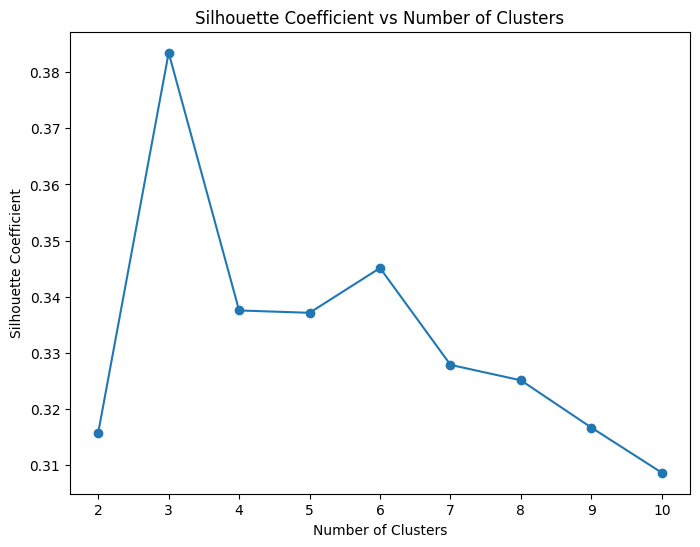

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, n_max + 1), silhouette_coefficients, marker='o')
plt.title('Silhouette Coefficient vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [ ]:
# Clustering de los embeddings con K-Means
kmeans = KMeans(n_clusters=3, random_state=0).fit(embeddings)


In [ ]:
# Guardar el modelo
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [ ]:
data['cluster'] = kmeans.labels_

In [ ]:
data.head(2)

,headline_text,publish_date,topic,topic_tfidf,processed_text,embeddings,bert_embedding,cluster,topic_kmeans
0,aba decides against community broadcasting lic...,20030219,1,0,ar decid community broadcasting licence,"[-0.021287803, 0.105737284, -0.09924506, -0.05...","[-0.14743373, 0.3037718, 0.0660148, -0.4202017...",2,0
1,act fire witnesses must be aware of defamation,20030219,0,0,act fire witnesses must aware defamation,"[-0.027255666, 0.101845995, -0.08277545, -0.04...","[0.18117753, 0.25889948, -0.3722156, -0.314140...",2,0


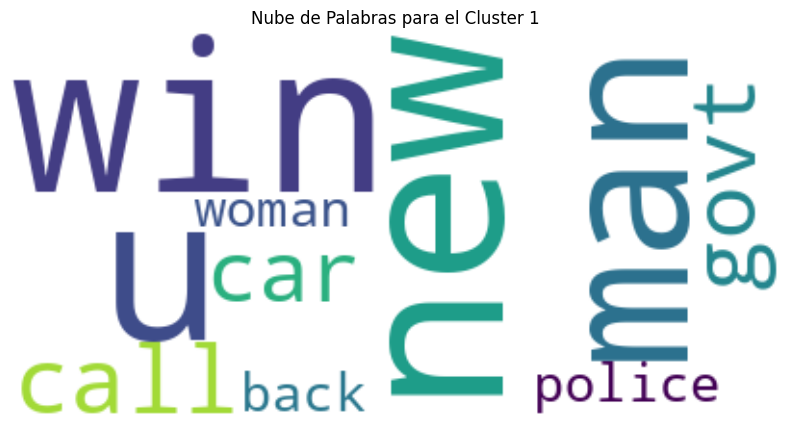

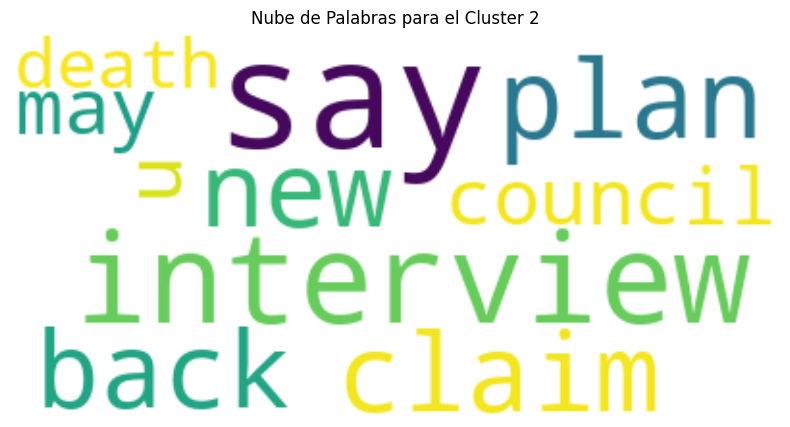

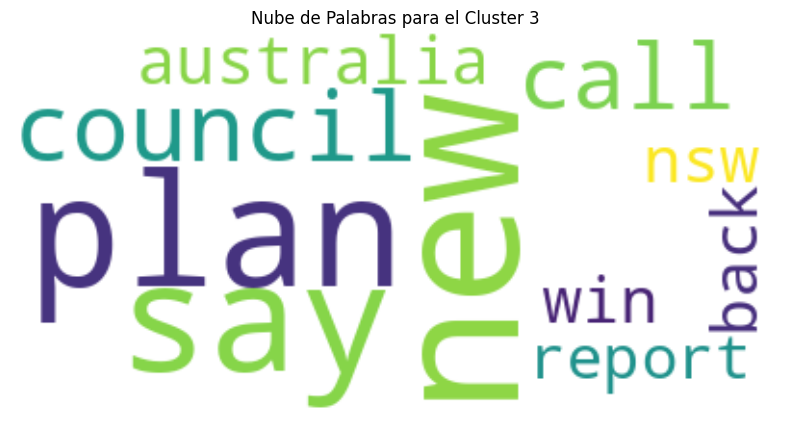

In [ ]:
for i in range(kmeans.n_clusters):
    cluster_texts = data[data['cluster'] == i]['processed_text']
    wordcloud = WordCloud(max_words=10, background_color='white').generate(' '.join(cluster_texts))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras para el Cluster {i+1}')
    plt.show()

### asignar etiqueta de Tema

In [ ]:
cluster_mapping = {
    0: 'Crime',
    1: 'Government',
    2: 'Council Report'
}


data['category'] = data['cluster'].map(cluster_mapping)

print(data.head())

                                       headline_text  publish_date  topic  \
0  aba decides against community broadcasting lic...      20030219      1   
1     act fire witnesses must be aware of defamation      20030219      0   
2     a g calls for infrastructure protection summit      20030219      1   
3           air nz staff in aust strike for pay rise      20030219      2   
4      air nz strike to affect australian travellers      20030219      2   

   topic_tfidf                              processed_text  \
0            0     ar decid community broadcasting licence   
1            0    act fire witnesses must aware defamation   
2            1    g calls infrastructure protection summit   
3            2          air nz staff aust strike pay risir   
4            1  air nz strike affect australian travellers   

                                          embeddings  \
0  [-0.021287803, 0.105737284, -0.09924506, -0.05...   
1  [-0.027255666, 0.101845995, -0.08277545, -0.04...

In [ ]:
data['headline_text'].to_csv('fasttext_input.txt', index=False, header=False)

In [ ]:
ft_model = fasttext.train_unsupervised('fasttext_input.txt', dim=300)

In [ ]:
ft_model

In [ ]:
ft_model.save_model('fasttext_model.bin')

In [ ]:
# Guardar el modelo FastText
!nohup fasttext_model.save_model('fasttext_model.bin') &

# Esperar unos segundos para asegurarse de que termine y luego comprimir el archivo
!sleep 30
!zip fasttext_model.zip fasttext_model.bin


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `nohup fasttext_model.save_model('fasttext_model.bin') &'
updating: fasttext_model.bin (deflated 88%)


In [ ]:
from google.colab import files

# Descargar el archivo comprimido
files.download('fasttext_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('fasttext_model.bin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
no_doc = np.random.randint(len(datos))

In [ ]:
data.head(3)

,headline_text,publish_date,topic,topic_tfidf,processed_text,embeddings,bert_embedding,cluster,topic_kmeans
0,aba decides against community broadcasting lic...,20030219,1,0,ar decid community broadcasting licence,"[-0.021287803, 0.105737284, -0.09924506, -0.05...","[-0.14743373, 0.3037718, 0.0660148, -0.4202017...",2,0
1,act fire witnesses must be aware of defamation,20030219,0,0,act fire witnesses must aware defamation,"[-0.027255666, 0.101845995, -0.08277545, -0.04...","[0.18117753, 0.25889948, -0.3722156, -0.314140...",2,0
2,a g calls for infrastructure protection summit,20030219,1,1,g calls infrastructure protection summit,"[-0.025790008, 0.08787479, -0.112358965, -0.05...","[-0.7137051, -0.34951463, 0.08916324, 0.057213...",2,0


In [ ]:
data['combination'] = data[['topic', 'topic_tfidf', 'cluster']].apply(lambda row: f"{row['topic']}-{row['topic_tfidf']}-{row['cluster']}", axis=1)


In [ ]:
combination_counts = data['combination'].value_counts().reset_index()
combination_counts.columns = ['combination', 'count']
print(combination_counts)

   combination  count
0        0-0-2   5627
1        1-0-2   3943
2        0-0-1   3772
3        1-1-2   3497
4        2-1-2   3209
5        0-2-2   3183
6        2-0-2   3096
7        1-2-2   2719
8        2-2-2   2631
9        0-0-0   2448
10       0-1-2   2404
11       0-2-1   2401
12       2-1-1   1970
13       2-1-0   1847
14       1-0-1   1794
15       0-2-0   1641
16       1-1-1   1619
17       2-0-1   1592
18       2-2-1   1464
19       1-0-0   1442
20       2-0-0   1411
21       2-2-0   1390
22       1-2-1   1363
23       1-2-0   1360
24       1-1-0   1331
25       0-1-0   1283
26       0-1-1   1253


In [ ]:
# Volcabulario del embedding
vocabulary = set(ft_model.words)

def doc_word_vectors(words, model, vocabulary, num_features):

    nwords = 0.
    no_found=[]
    doc=[]
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            doc.append(model.get_word_vector(word))
        else:
            no_found.append(word)



    return np.array(doc),no_found

emb0,no_found = doc_word_vectors(datos['tokens'].iloc[no_doc], model=ft_model, vocabulary=vocabulary, num_features=ft_model.dim)

print('Dimensión del Embedding:',emb0.shape)
print('\nPalabras no encontradas:\n\n',no_found)

Dimensión del Embedding: (4, 300)

Palabras no encontradas:

 ['20b', 'drove', 'nbns']


In [ ]:
data['embeddings'] = data['headline_text'].apply(lambda x: ft_model.get_sentence_vector(x))

In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):

    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.get_word_vector(word))

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.words)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:

ftext_feature_array = averaged_word_vectorizer(corpus=datos['tokens'], model=ft_model, num_features=ft_model.dim)

In [ ]:
doc_embedding = pd.DataFrame(ftext_feature_array)
doc_embedding.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.084465,0.202021,-0.208492,-0.128345,0.077370,0.074375,0.036759,0.149162,0.121317,0.104198,...,-0.139222,-0.015665,0.282101,0.031757,-0.056048,0.041708,-0.075184,0.089052,-0.060005,0.093828
1,-0.109099,0.226955,-0.172863,-0.121689,0.095879,0.074349,0.085214,0.141875,0.138116,0.119742,...,-0.127639,-0.055927,0.307724,0.037059,-0.072697,0.017561,-0.089049,0.101819,-0.015341,0.089395
2,-0.079641,0.189896,-0.190157,-0.119469,0.064423,0.063029,0.024629,0.148135,0.124726,0.111891,...,-0.169353,-0.002900,0.238810,0.029825,-0.037550,0.040850,-0.055524,0.106576,-0.033058,0.115917
3,-0.100853,0.194832,-0.165358,-0.091151,0.088227,0.027166,0.047181,0.116303,0.145816,0.106789,...,-0.160726,-0.024245,0.249624,0.035991,-0.012687,-0.025773,-0.053671,0.121208,0.019059,0.123642
4,-0.117511,0.188501,-0.148646,-0.089437,0.106798,-0.006755,0.039992,0.108294,0.134053,0.118300,...,-0.168888,-0.026068,0.248750,0.043447,-0.012751,-0.058404,-0.045415,0.093264,0.012521,0.125156


In [ ]:
doc_embedding.to_csv(
     'Doc_Embedding.csv')

In [ ]:

doc_embedding = pd.read_csv('Doc_Embedding.csv',index_col=0)
doc_embedding.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.084465,0.202021,-0.208492,-0.128345,0.077370,0.074375,0.036759,0.149162,0.121317,0.104198,...,-0.139222,-0.015665,0.282101,0.031757,-0.056048,0.041708,-0.075184,0.089052,-0.060005,0.093828
1,-0.109099,0.226955,-0.172863,-0.121689,0.095879,0.074349,0.085214,0.141875,0.138116,0.119742,...,-0.127639,-0.055927,0.307724,0.037059,-0.072697,0.017561,-0.089049,0.101819,-0.015341,0.089395
2,-0.079641,0.189896,-0.190157,-0.119469,0.064423,0.063029,0.024629,0.148135,0.124726,0.111891,...,-0.169353,-0.002900,0.238810,0.029825,-0.037550,0.040850,-0.055524,0.106576,-0.033058,0.115917
3,-0.100853,0.194832,-0.165358,-0.091151,0.088227,0.027166,0.047181,0.116303,0.145816,0.106789,...,-0.160726,-0.024245,0.249624,0.035991,-0.012687,-0.025773,-0.053671,0.121208,0.019059,0.123642
4,-0.117511,0.188501,-0.148646,-0.089437,0.106798,-0.006755,0.039992,0.108294,0.134053,0.118300,...,-0.168888,-0.026068,0.248750,0.043447,-0.012751,-0.058404,-0.045415,0.093264,0.012521,0.125156


In [ ]:
from kneed import KneeLocator

embeddings = np.stack(data['embeddings'].values)

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Encontrar el número óptimo de clústeres con K-means usando el método de codo
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings_pca)
    sse.append(kmeans.inertia_)

knee = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
optimal_k = knee.knee

# Aplicar K-means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['topic_kmeans'] = kmeans.fit_predict(embeddings_pca)

In [ ]:
pca = PCA(n_components=30, random_state=0)
pcs = pca.fit_transform(doc_embedding.values)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pcs = scaler.fit_transform(pcs)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.43680886 0.74550825 0.86467944 0.91544272 0.94853025 0.96751436
 0.97728944 0.98228785 0.98643213 0.98862762 0.99071835 0.99236447
 0.99361566 0.99443284 0.99515259 0.99576609 0.99623948 0.99662891
 0.99698522 0.99731947 0.99757666 0.99781834 0.99800944 0.9981716
 0.99831834 0.99845913 0.99858105 0.99868819 0.99878102 0.99886489]


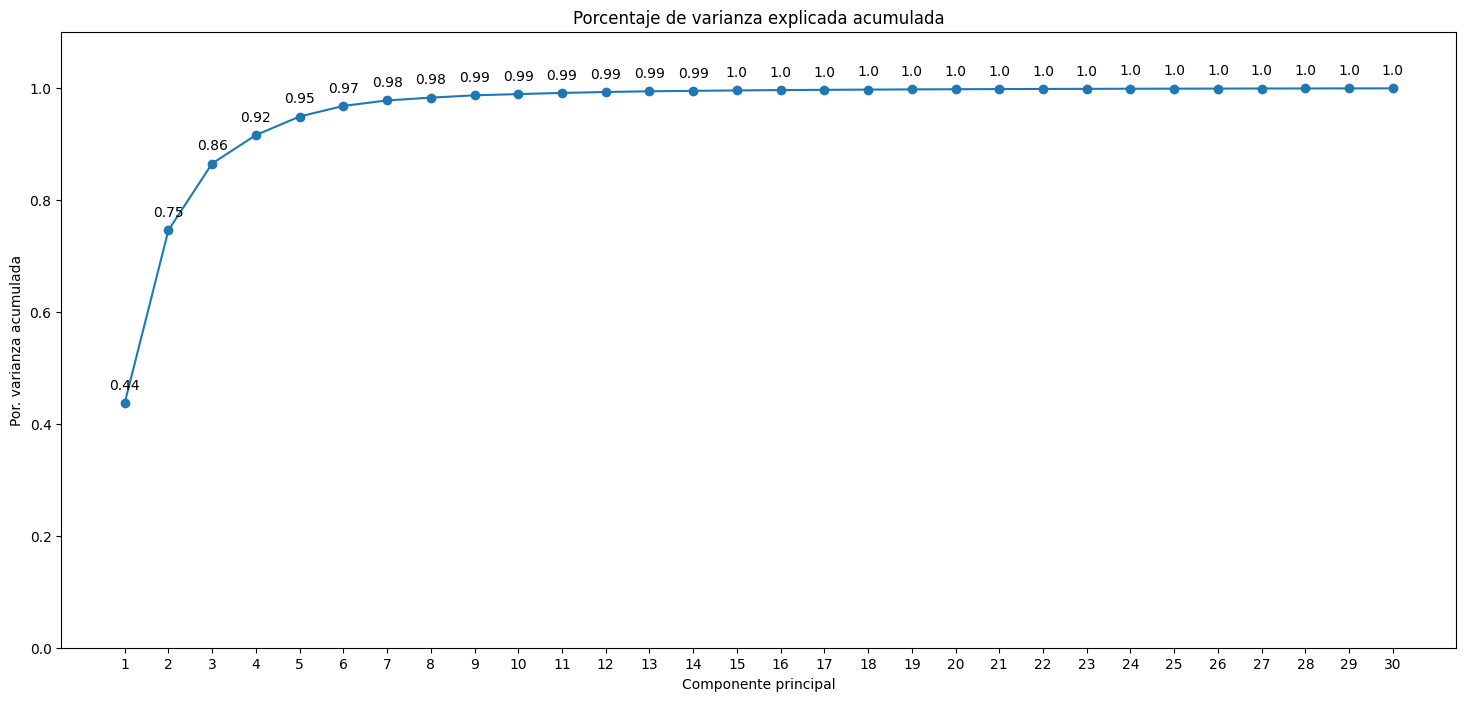

In [ ]:
%matplotlib inline

# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
ax.plot(
    np.arange(pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

#ax.axvline(x=11, linestyle = '--')
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

# Notice you start at 2 clusters for silhouette coefficient
n_max=10
for k in range(2, n_max):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_pcs)
    score = silhouette_score(scaled_pcs, kmeans.labels_)
    silhouette_coefficients.append(score)

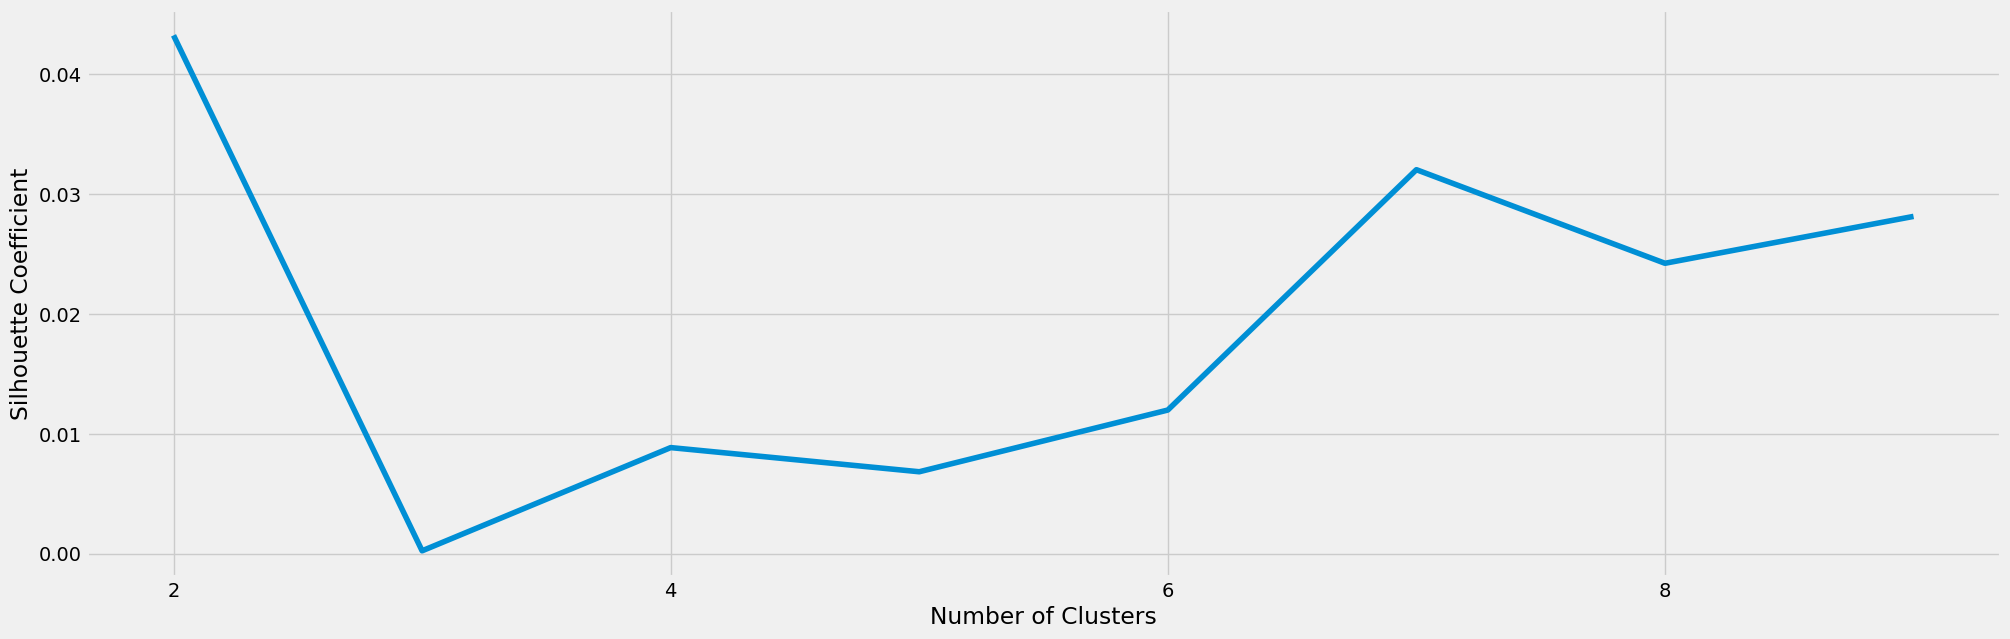

In [ ]:
plt.figure(figsize=(22, 7))
plt.style.use("fivethirtyeight")
plt.plot(range(2, n_max), silhouette_coefficients)
plt.xticks(range(2, n_max,2))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
cf = pd.DataFrame({'clúster':range(2, n_max),'silueta':silhouette_coefficients})
cf.loc[cf["silueta"]==np.max(cf["silueta"])]

,clúster,silueta
0,2,0.043224


In [ ]:
%%time
K_ = 2
km = KMeans(n_clusters=K_, random_state=0)
km.fit_transform(scaled_pcs)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['Grupo'])

CPU times: user 334 ms, sys: 16.4 ms, total: 350 ms
Wall time: 1.13 s


In [ ]:
data["FAST"] = km.labels_
data.head()

,headline_text,publish_date,embeddings,topic_kmeans,FAST
0,aba decides against community broadcasting lic...,20030219,"[-0.05151738, 0.09706684, -0.09201038, -0.0588...",2,1
1,act fire witnesses must be aware of defamation,20030219,"[-0.053102456, 0.1066069, -0.08100093, -0.0581...",2,1
2,a g calls for infrastructure protection summit,20030219,"[-0.042300962, 0.09108994, -0.08835854, -0.057...",2,1
3,air nz staff in aust strike for pay rise,20030219,"[-0.05006297, 0.09333752, -0.07772018, -0.0440...",2,1
4,air nz strike to affect australian travellers,20030219,"[-0.06059787, 0.09569492, -0.07470202, -0.0456...",0,0


In [ ]:
km.n_clusters

2

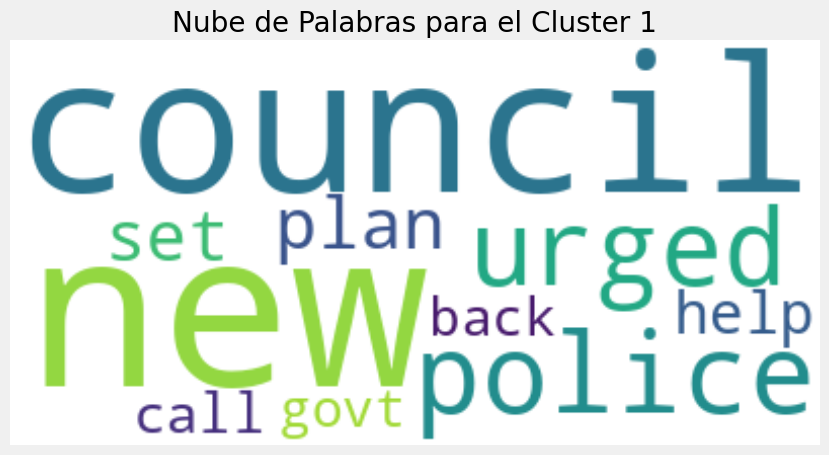

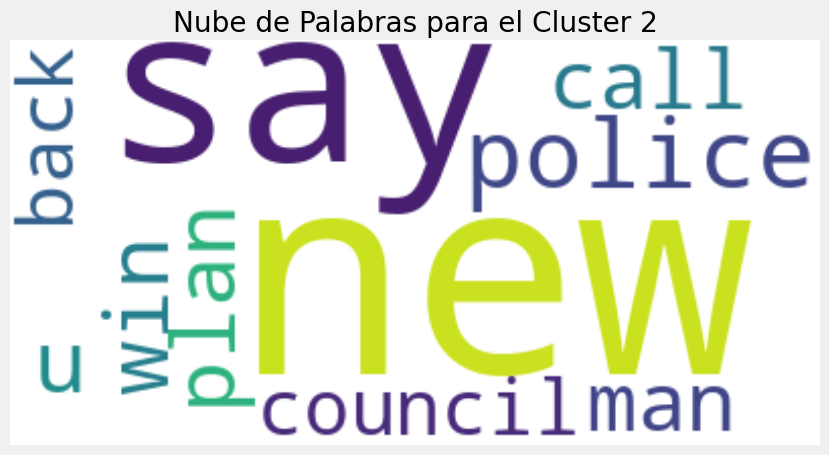

In [ ]:
for i in range(km.n_clusters):
    cluster_texts = data[data['FAST'] == i]['headline_text']
    wordcloud = WordCloud(max_words=10, background_color='white').generate(' '.join(cluster_texts))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras para el Cluster {i+1}')
    plt.show()

## Comparación de los métodos

In [ ]:
data_LDA.head()

,essay_text,essay_id,topic,topic_tfidf
0,alimentacion calidad espacio quehacer persona ...,1,0,2
1,"salud, economia amor gustar pedir ayuda gustar...",2,2,0
2,aseo alguien ayudar tarea hogar relajacion,5,1,1
3,"optimo condicion becas, subsidio viviendar usa...",6,1,0
4,calidad vida sostenible compañero contratacion...,8,2,2


In [ ]:
data = data.drop(["Unnamed: 0"],axis = 1)
data["essay_id"] = data_LDA["essay_id"].copy()
data.head()

,essay_text,processed_text,bert_embedding,cluster,FAST,essay_id
0,Alimentación y tiempo de calidad y buen espac...,alimentacion calidad espacio quehacer persona ...,"[-0.38859102, 0.37220109, 0.1873405, -0.118884...",2,0,1
1,"Salud, economía y amor No me gusta pedir ayud...","salud, economia amor gustar pedir ayuda gustar...","[-0.18367776, -0.16293284, 0.342023, -0.268485...",1,1,2
2,Aseo Alguien que ayude con las tareas del hog...,aseo alguien ayudar tarea hogar relajacion,"[-0.082458965, -0.31093502, 0.24474344, -0.076...",1,0,5
3,"Que esté en óptimas condiciones Becas, subsid...","optimo condicion becas, subsidio viviendar usa...","[0.16750498, -0.19527999, -0.47310993, 0.00376...",2,0,6
4,Darle una calidad de vida sostenible En el tr...,calidad vida sostenible compañero contratacion...,"[0.0010602431, 0.26355734, -0.31374043, 0.7459...",0,0,8


In [ ]:
data_LDA = data_LDA.drop(["essay_text"],axis = 1)

In [ ]:
print(data.shape[0])
data = pd.merge(data,data_LDA,on = ["essay_id"], how = "left")
print(data.shape[0])

354
354


In [ ]:
data.isnull().sum()

,0
essay_text,0
processed_text,0
bert_embedding,0
cluster,0
FAST,0
essay_id,0
topic,0
topic_tfidf,0
